In [1]:
!git clone https://github.com/sanchit2843/image_classification

Cloning into 'image_classification'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 283 (delta 44), reused 28 (delta 11), pack-reused 205
Receiving objects: 100% (283/283), 1.45 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [2]:
#Upload kaggle.json file
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
getdata.kaggle()

Looking in indexes: https://test.pypi.org/simple/


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 98% 1.13G/1.15G [00:14<00:00, 47.3MB/s]
100% 1.15G/1.15G [00:14<00:00, 87.4MB/s]


In [0]:
getdata.zipextract('/content/chest-xray-pneumonia.zip')

In [0]:
getdata.zipextract('/content/chest_xray.zip')

In [1]:
import os
os.chdir('/content/image_classification')
import dataloader,model,training
from predict import predict
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import torchvision
import numpy as np

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [0]:
im_size = 256
batch_size = 16
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor()])
train_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/train', transform = train_transforms)
train_loader =  DataLoader(train_data, batch_size = batch_size , shuffle = True)

In [0]:
#mean,std = dataloader.normalization_parameter(train_loader)
import torch
mean = torch.from_numpy(np.asarray([0.4823, 0.4823, 0.4823]))
std = torch.from_numpy(np.asarray([0.2218, 0.2218, 0.2218]))

In [0]:
#image transformations for train and test data
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomRotation(degrees=5),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
test_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

#inverse normalization for image plot

inv_normalize =  transforms.Normalize(
    mean=-1*np.divide(mean,std),
    std=1/std
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Printing random data from dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

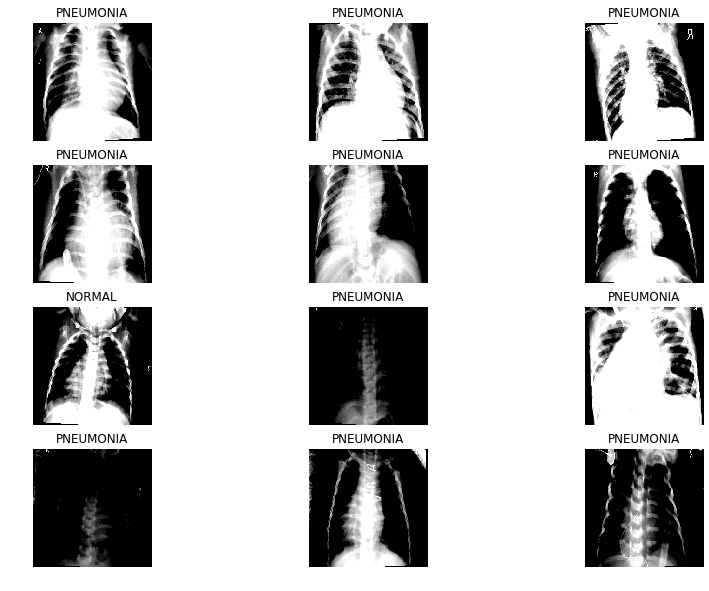

In [8]:
train_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/train', transform = train_transforms)
test_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/test', transform = test_transforms)
valid_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/val', transform = test_transforms)

classes = train_data.classes
#encoder and decoder to convert classes into integer
decoder = {}
for i in range(len(classes)):
    decoder[classes[i]] = i
encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

dataloaders = dataloader.data_loader(train_data,encoder,test_data, test_data, batch_size = batch_size)

In [0]:
from torch import nn
from torchvision import models
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        model = models.densenet201(pretrained = True)
        model = model.features
        self.model = model
        self.linear = nn.Linear(1920, 2)
        self.bn1 = nn.BatchNorm1d(1920)
        self.dropout2 = nn.Dropout(0.2)
    def forward(self, input):
        am = self.model(input)
        out = nn.functional.adaptive_avg_pool2d(am, output_size = 1)
        batch = out.shape[0]
        out = out.view(batch, -1)
        res = self.linear(self.dropout2(self.bn1(out)))
        return res
net = classifier().to('cuda')

In [0]:
# change learning rate value according to lr finder
lr = 1e-4

Epoch: 0
[Epoch 0/1] [Batch 38/39] [Loss: 0.743177 (0.166343), Acc: 87.50% (94.16%)]Validation loss decreased (inf --> 0.166343).  Saving model ...
val Accuracy: 94.16095890410959


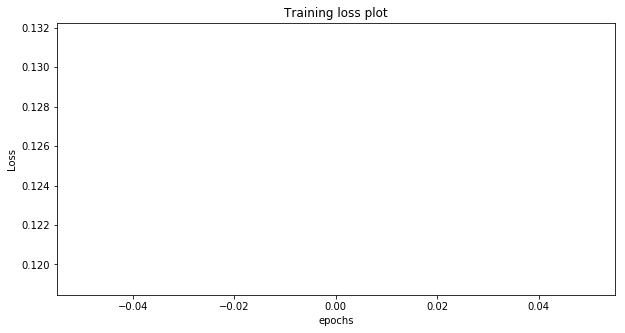

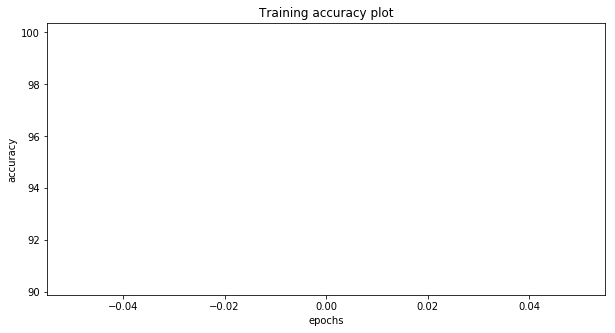

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255]

tensor(0.8606, device='cuda:0', dtype=torch.float64) 0.5089804964760939
Classes in order Actual and Predicted


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


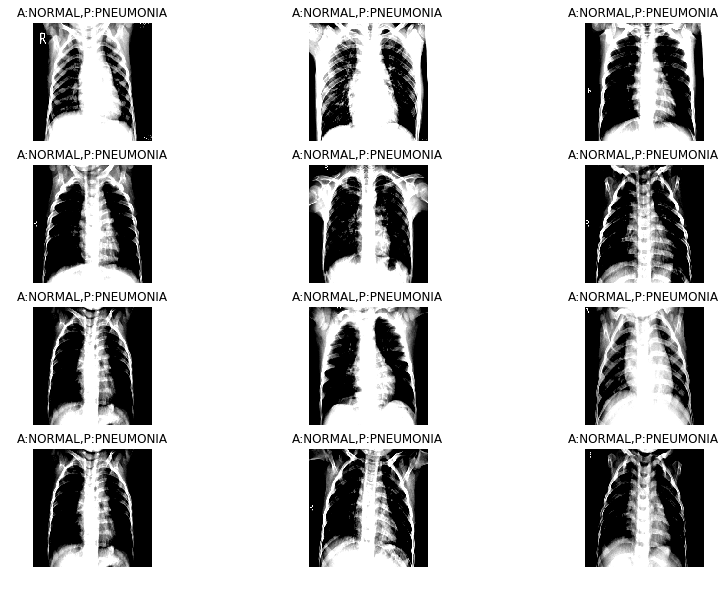

Precision: 90.10241039090796 Recall: 81.66666666666667, Accuracy: 86.0576923076923: ,f1_score: 83.70742511411824
Confusion matrix, without normalization
[[150  84]
 [  3 387]]


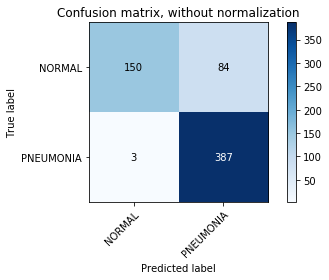

In [18]:
# Dataloaders is a dictionary returned by data_loader function
# Patience is the parameter of early stopping. If the val loss is not reduced for 5 epochs the loop will be breaked and training will be interrupted
# Classes is a dictionary of the name of classes in dataset
training.train_model(net,dataloaders,encoder,inv_normalize,num_epochs=1,lr = lr,batch_size = batch_size,patience = 3,classes = classes)

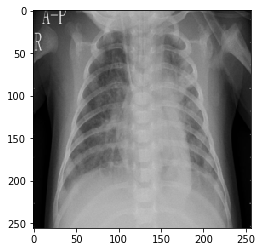

Class: PNEUMONIA , confidence: 99.99998474121094
Class: NORMAL , confidence: 1.2131360563216731e-05


tensor([1], device='cuda:0')

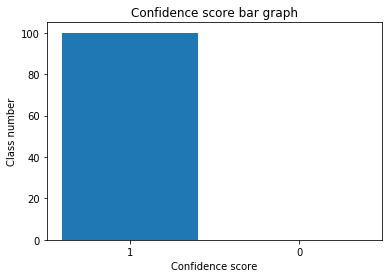

In [19]:
import cv2
image = cv2.imread('/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
predict(net,image,'cuda',encoder,test_transforms,inv_normalize)

In [21]:
import torch
#torch.save(net.state_dict(),'/content/model.h5')
from torch import nn
from torchvision import models
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        model = models.densenet201(pretrained = True)
        model = model.features
        self.model = model
        self.linear = nn.Linear(1920, 2)
        self.bn1 = nn.BatchNorm1d(1920)
        self.dropout2 = nn.Dropout(0.2)
    def forward(self, input):
        am = self.model(input)
        out = nn.functional.adaptive_avg_pool2d(am, output_size = 1)
        batch = out.shape[0]
        out = out.view(batch, -1)
        res = self.linear(self.dropout2(self.bn1(out)))
        return am,res
      
net = classifier().to('cuda')
net.load_state_dict(torch.load('/content/model.h5'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [23]:
os.listdir('/content/chest_xray/train/PNEUMONIA')[5]

'person1003_virus_1685.jpeg'

/content/image_classification/util.py:179: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = sm(logits)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


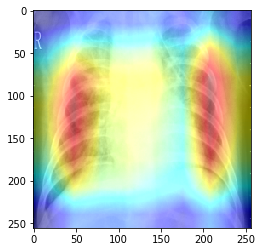

predicted class is: PNEUMONIA


In [24]:
im_size = 256
test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

from util import cam

cam(net,'/content/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg',encoder,test_transforms,inv_normalize)